In [53]:
import numpy as np
from typing import Tuple, Dict

# class GeneticAlgorithm:
#     def __init__(self, population_size: int, dimension: int, mating_pool_size: int, mutation_probability: float):
#         self.population_size = population_size
#         self.dimension = dimension
#         self.mating_pool_size = mating_pool_size
#         self.mutation_probability = mutation_probability

def initialize_population(population_size, dimension) -> np.ndarray:
    return np.array([np.random.permutation(np.arange(1, dimension + 1)) for _ in range(population_size)])

def fitness(x):
    # D = len(x)
    checks = compute_checks_array(x)
    # return ((D)*(D-1)/2) - checks
    return -checks

def mutate(individual: np.ndarray, dimension, mutation_probability) -> np.ndarray:
    if np.random.rand() < mutation_probability:
        swap_indices = np.random.choice(dimension, 2, replace=False)
        individual[swap_indices[0]], individual[swap_indices[1]] = individual[swap_indices[1]], individual[swap_indices[0]]
    return individual

def crossover(parent1,parent2):
    D = len(parent1)
    assert (len(parent2) == D), "Parents are not of the same size"
    crossover_point = np.random.choice(D)
    if (crossover_point == 0):
        crossover_point = crossover_point+1
    
    children_1 = np.zeros((D))
    children_2 = np.zeros((D))
    
    children_1[0:crossover_point-1] = parent1[0:crossover_point-1]
    children_2[0:crossover_point-1] = parent2[0:crossover_point-1] 

    complement_1 = parent2
    complement_2 = parent1
    for i in range(0,crossover_point):
        complement_1 = complement_1[complement_1 != children_1[i]]
        complement_2 = complement_2[complement_2 != children_2[i]]
    
    children_1[crossover_point-1:] = complement_1[:]
    children_2[crossover_point-1:] = complement_2[:]
    return children_1,children_2

def compute_checks_array(p,DEBUG=False):
    assert (len(p) == len(set(p))), "Invalid Individual"
    checks = 0
    for i in range(len(p)):
        for j in range(i+1,len(p)):
            if (p[i] + (j-i) == p[j]):
                checks = checks + 1
            elif (p[i] - (j-i) == p[j]):
                checks = checks + 1
                    
    return checks

def selection(fitnesses: np.ndarray) -> Tuple[int, int]:
    probabilities = np.exp(fitnesses)
    probabilities /= probabilities.sum()
    return tuple(np.random.choice(population_size, 2, replace=False, p=probabilities))

def genetic_algorithm(population_size: int, dimension: int, mating_pool_size: int, mutation_probability: float) -> Dict[str, any]:
    population = initialize_population(population_size, dimension)
    best_fitness = -np.inf
    best_individual = None
    best_possible_fitness = 0 #self.dimension * (self.dimension - 1) / 2
    rounds_without_improvement = 0
    rounds = 0

    while best_fitness != best_possible_fitness and rounds_without_improvement < 500:
        population_fitness = np.array([fitness(ind) for ind in population])
        max_fitness_index = np.argmax(population_fitness)
        if population_fitness[max_fitness_index] > best_fitness:
            best_fitness = population_fitness[max_fitness_index]
            best_individual = population[max_fitness_index]

        children = []
        for _ in range(mating_pool_size):
            p1, p2 = selection(population_fitness)
            c1, c2 = crossover(population[p1], population[p2])
            c1, c2 = mutate(c1, dimension, mutation_probability), mutate(c2, dimension, mutation_probability)
            children.extend([c1, c2])
        
        children = np.array(children)
        children_fitness = np.array([fitness(child) for child in children])
        sorted_indices = np.argsort(children_fitness)[::-1]
        population = children[sorted_indices][:population_size]

        rounds += 1
        if best_fitness == population_fitness[max_fitness_index]:
            rounds_without_improvement += 1
        else:
            rounds_without_improvement = 0

    

    return {
        "best_individual": best_individual,
        "best_fitness": best_fitness,
        "rounds_without_improvement": rounds_without_improvement,
        "rounds": rounds
    }

dimension=8
population_size = 30
mating_pool_size = 15
mutation_probability = 0.1

# Example usage
results = genetic_algorithm(population_size=population_size, dimension=dimension, 
                      mating_pool_size=mating_pool_size, mutation_probability=mutation_probability)
print(f"Best Fitness: {results['best_fitness']}")
print(f"Rounds: {results['rounds']}, Rounds Without Improvement: {results['rounds_without_improvement']}")


Best Fitness: 0
Rounds: 44, Rounds Without Improvement: 44


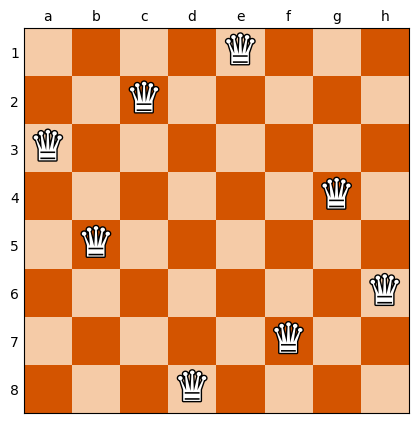

In [54]:
from viz import draw_chessboard
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(5,5))
draw_chessboard(dimension, results["best_individual"] - 1, ax)

In [21]:
results["best_individual"]

array([5., 3., 1., 7., 2., 8., 6., 4.])